<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped_doc.svg?sanitize=true">
<font size="+3">Effective computation in Biomechanics</font>

<font size="+2">Romain Martinez</font> <a href="https://github.com/romainmartinez"><img src="https://img.shields.io/badge/github-romainmartinez-green?logo=github&style=social" /></a>

<!--NAVIGATION-->
< [Scientific computing with Numpy](01.02-intro-to-numpy.ipynb) | [Contents](index.ipynb) | [Programming tips and tricks](01.04-tips-and-tricks.ipynb) >

# Biomechanical analysis with Pyomeca

<center>
  <img
    src="https://raw.githubusercontent.com/pyomeca/design/master/logo/logo_plain_doc.svg?sanitize=true"
    alt="logo"
    width="800px"
  />
</center>
<center style="margin: 10px">
  <a href="https://travis-ci.org/pyomeca/pyomeca"
    ><img
      alt="Actions Status"
      src="https://travis-ci.org/pyomeca/pyomeca.svg?branch=travis"
  /></a>
  <a href="https://anaconda.org/conda-forge/pyomeca"
    ><img
      alt="License"
      src="https://anaconda.org/conda-forge/pyomeca/badges/license.svg"
  /></a>
  <a href="https://anaconda.org/conda-forge/pyomeca"
    ><img
      alt="latest release"
      src="https://anaconda.org/conda-forge/pyomeca/badges/latest_release_date.svg"
  /></a>
  <a href="https://anaconda.org/conda-forge/pyomeca"
    ><img
      alt="Downloads"
      src="https://anaconda.org/conda-forge/pyomeca/badges/downloads.svg"
  /></a>
  <a href="https://github.com/psf/black"
    ><img
      alt="Code style: black"
      src="https://img.shields.io/badge/code%20style-black-000000.svg"
  /></a>
</center>


Pyomeca is a python library allowing you to carry out a complete biomechanical analysis; in a simple, logical and concise way.

## Pyomeca documentation

See Pyomeca's [documentation site](https://romainmartinez.github.io/motion).

## Example

Here is an example of a complete EMG pipeline in just one command:

```python
from pyomeca import Analogs3d

emg = (
    Analogs3d.from_c3d("your_c3d.c3d", names=['anterior_deltoid', 'biceps'])
    .band_pass(freq=2000, order=4, cutoff=[10, 425])
    .center()
    .rectify()
    .low_pass(freq=2000, order=4, cutoff=5)
    .normalization()
    .time_normalize()
)
```

## Features

- Object-oriented architecture where each class is associated with common and specialized functionalities:
  - **Markers3d**: 3d markers positions
  - **Analogs3d**: analogs (emg, force or any analog signal)
  - **GeneralizedCoordinate**: generalized coordinate (joint angle)
  - **RotoTrans**: roto-translation matrix


- Specialized functionalities include signal processing routine commonly used in biomechanics: filters, normalization, onset detection, outliers detection, derivative, etc.


- Each functionality can be chained. In addition to making it easier to write and read code, it allows you to add and remove analysis steps easily (such as Lego blocks).


- Each class inherits from a numpy array, so you can create your own analysis step easily.


- Easy reading and writing interface to common files in biomechanics (c3d, csv, mat, sto, trc, mot, xlsx)


- Common linear algebra routine implemented: get Euler angles to/from roto-translation matrix, create a system of axes, set a rotation or translation, transpose or inverse, etc.

## Installation

### Using Conda

First, install [miniconda](https://conda.io/miniconda.html) or [anaconda](https://www.anaconda.com/download/).
Then type:

```bash
conda install pyomeca -c conda-forge
```

## Integration with other modules

Pyomeca is designed to work well with other libraries that we have developed:

- [pyosim](https://github.com/pyomeca/pyosim): interface between [OpenSim](http://opensim.stanford.edu/) and pyomeca to perform batch musculoskeletal analyses
- [ezc3d](https://github.com/pyomeca/ezc3d): Easy to use C3D reader/writer in C++, Python and Matlab
- [biorbd](https://github.com/pyomeca/biorbd): C++ interface and add-ons to the Rigid Body Dynamics Library, with Python and Matlab binders.

## Bug Reports & Questions

Pyomeca is Apache-licensed and the source code is available on [GitHub](https://github.com/pyomeca/pyomeca). If any questions or issues come up as you use pyomeca, please get in touch via [GitHub issues](https://github.com/pyomeca/pyomeca/issues). We welcome any input, feedback, bug reports, and contributions.

---

## Reading and writing files

| Type | Reading example | Writing example | Class | Description |
|---------|--------------------------|------------------------------------------|-----------------------------|----------------------------------------|
| `c3d` | `Markers3d.from_c3d()` |  | `Markers3d` and `Analogs3d` | C3d file |
| `csv` | `Markers3d.from_csv()` | `Markers3d.to_csv()` | `Markers3d` and `Analogs3d` | Csv file |
| `excel` | `Markers3d.from_excel()` |  | `Markers3d` and `Analogs3d` | Excel file |
| `sto` | `Analogs3d.from_sto()` | `Analogs3dOsim.to_sto()` (pyosim needed) | `Analogs3d` | Analogs file used in Opensim |
| `mot` | `Analogs3d.from_mot()` | `Analogs3dOsim.to_mot()` (pyosim needed) | `Analogs3d` | Joint angles file used in Opensim |
| `trc` | `Markers3d.from_trc()` | `Markers3dOsim.to_trc()` (pyosim needed) | `Markers3d` | Markers positions file used in OpenSim |

In [1]:
from pathlib import Path
from pyomeca import Markers3d, Analogs3d
from utils import describe_data

%load_ext lab_black

data_path = Path("..") / "data" / "markers_analogs.c3d"

analogs = Analogs3d.from_c3d(data_path)

In [2]:
describe_data(analogs)

__<span style='color:firebrick'>Shape</span>__: (1, 38, 11600)

__<span style='color:firebrick'>Rate</span>__: 2000.0

__<span style='color:firebrick'>Labels</span>__:

['Voltage.1', 'Voltage.2', 'Voltage.3', 'Voltage.4', 'Voltage.5', 'Voltage.6', 'Delt_ant.EMG1', 'Infra.EMG10', 'Subscap.EMG11', '12.EMG12', '13.EMG13', '14.EMG14', '15.EMG15', '16.EMG16', 'Delt_med.EMG2', 'Delt_post.EMG3', 'Biceps.EMG4', 'Triceps.EMG5', 'Trap_sup.EMG6', 'Trap_inf.EMG7', 'Gd_dent.EMG8', 'Supra.EMG9', 'EMG1', 'EMG10', 'EMG11', 'EMG12', 'EMG13', 'EMG14', 'EMG15', 'EMG16', 'EMG2', 'EMG3', 'EMG4', 'EMG5', 'EMG6', 'EMG7', 'EMG8', 'EMG9']


__<span style='color:firebrick'>Time Frames</span>__:

[0.0000e+00 5.0000e-04 1.0000e-03 ... 5.7890e+00 5.7895e+00 5.7900e+00]


__<span style='color:firebrick'>First Frame</span>__:

[[-2.20515728e-02 -1.03979707e-02 -1.54441223e-02 -3.72455120e-02
   7.31565058e-03  1.04316175e-02 -2.60891229e-05  2.23239495e-05
   2.87022194e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.02107289e-05 -1.36110339e-05
   9.72763337e-06  3.79955077e-06  4.21132700e-06 -9.91835077e-06
  -2.29653051e-06  2.97530321e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.78752043e-06  3.85072917e-06  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [3]:
markers = Markers3d.from_c3d(
    data_path, prefix=":", names=["EPICm", "LARMm", "LARMl", "LARM_elb"]
)
describe_data(markers)

__<span style='color:firebrick'>Shape</span>__: (4, 4, 580)

__<span style='color:firebrick'>Rate</span>__: 100.0

__<span style='color:firebrick'>Labels</span>__:

['EPICm', 'LARMm', 'LARMl', 'LARM_elb']


__<span style='color:firebrick'>Time Frames</span>__:

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

__<span style='color:firebrick'>First Frame</span>__:

[[662.2623291  641.40118408 582.25305176 678.54089355]
 [450.61416626 564.45166016 524.54125977 500.98504639]
 [321.36239624 281.25653076 271.89208984 304.51834106]
 [  1.           1.           1.           1.        ]]


## Signal processing

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")

raw = analogs["Delt_ant.EMG1"].abs()


def create_plots(data, labels):
    _, ax = plt.subplots(figsize=(12, 6))
    for datum, label in zip(data, labels):
        datum.plot(label=label, lw=3, ax=ax)
    plt.legend()
    sns.despine()

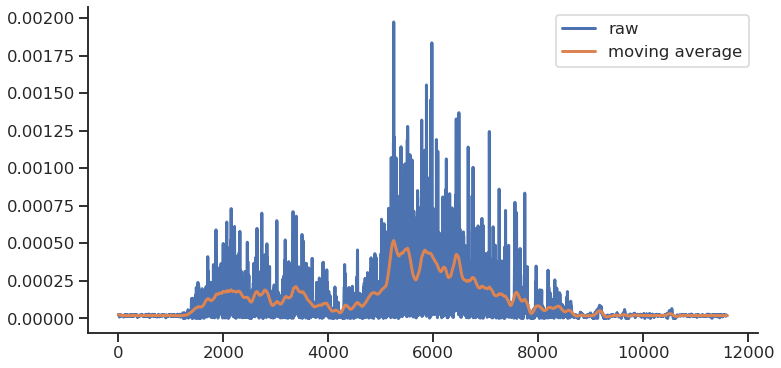

In [5]:
moving_average = raw.moving_average(window_size=100)

create_plots(data=[raw, moving_average], labels=["raw", "moving average"])

### Your turn

From the `raw` array:

1. Render the same plot using the `moving_median` and `moving_rms` methods

2. Plot the three kind of smoothing methods together

## Filtering methods

In [6]:
import numpy as np

# fake data
freq = 100
time = np.arange(0, 1, 0.01)
w = 2 * np.pi * 1
y = np.sin(w * time) + 0.1 * np.sin(10 * w * time)
y = Analogs3d(y.reshape(1, 1, -1))

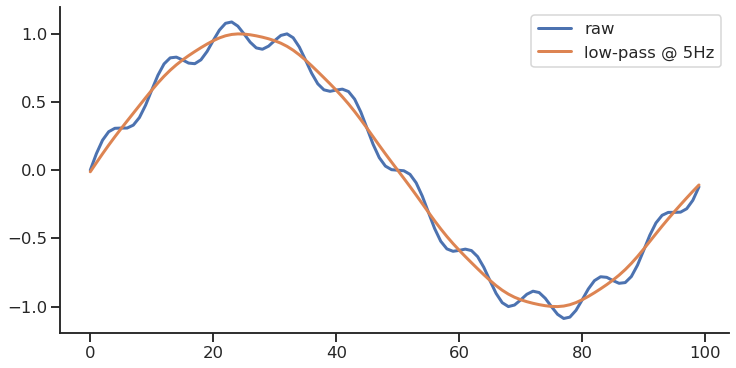

In [7]:
low_pass = y.low_pass(freq=freq, order=2, cutoff=5)

create_plots(data=[y, low_pass], labels=["raw", "low-pass @ 5Hz"])

### Your turn

From the `raw` array:

1. Render the same plot using the `band_pass` (4th order with 10-200Hz cutoff), `band_stop` (2nd order with 40-60Hz cutoff) and `high_pass` (2nd order with 100Hz cutoff) methods

## Utils methods

### FFT

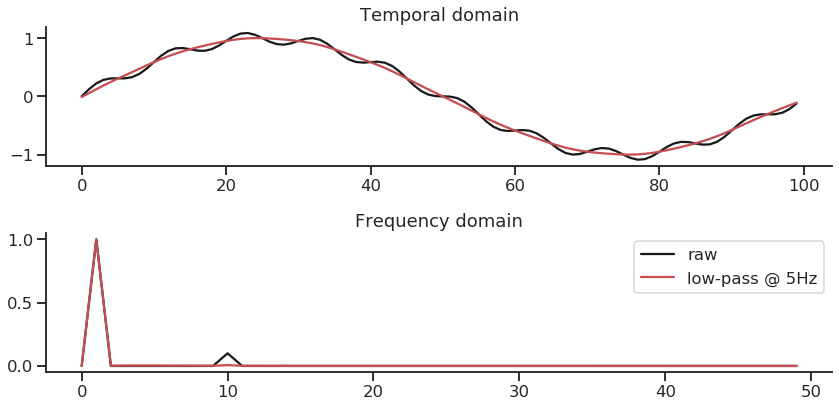

In [8]:
amp, freqs = y.fft(freq=freq)
amp_filtered, freqs_filtered = low_pass.fft(freq=freq)

_, ax = plt.subplots(2, 1, figsize=(12, 6))

y.plot("k-", ax=ax[0], label="raw")
low_pass.plot("r-", ax=ax[0], label="low-pass @ 5Hz")
ax[0].set_title("Temporal domain")

ax[1].plot(freqs, amp.squeeze(), "k-", label="raw")
ax[1].plot(freqs_filtered, amp_filtered.squeeze(), "r-", label="low-pass @ 5Hz")
ax[1].set_title("Frequency domain")

ax[1].legend()
plt.tight_layout()
sns.despine()

### Normalization

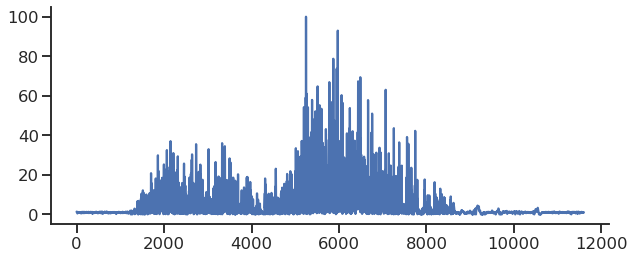

In [9]:
# if `ref` is not specified (MVC), take normalize with signal max
raw.rectify().normalization().plot()
sns.despine()

In [10]:
raw.normalization??

Signature: raw.normalization(ref=None, scale=100)
Source:   
    def normalization(self, ref=None, scale=100):
        """
        Normalize a signal against `ref` (x's max if empty) on a scale of `scale`

        Parameters
        ----------
        ref : np.ndarray
            reference value
        scale
            Scale on which to express x (100 by default)

        Returns
        -------
        FrameDependentNpArray
        """
        if not np.any(ref):
            ref = np.nanmax(self, axis=-1)
        # add one dimension
        ref = np.expand_dims(ref, axis=-1)
        return self / (ref / scale)
File:      ~/miniconda3/envs/tutorials/lib/python3.8/site-packages/pyomeca/frame_dependent.py
Type:      method


### Time normalization

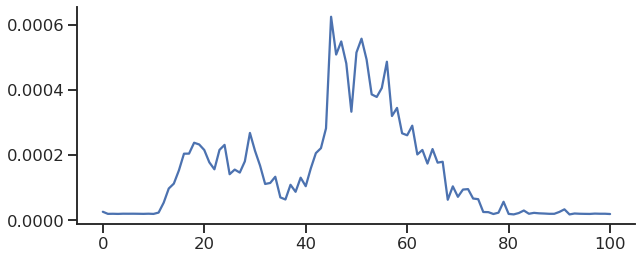

In [11]:
raw.moving_rms(100).time_normalization().plot()
sns.despine()

### Detect onset

In [12]:
# insert some 0 in the signal
signal = moving_average.copy()
signal[..., 6000:6500] = 0

mu = signal[..., : int(signal.get_rate)].mean()

In [13]:
onset = signal.detect_onset(
    threshold=mu + mu * 0.1,  # mean of the first second + 10%
    above=int(signal.get_rate) / 2,  # we want at least 1/2 second above the threshold
    below=int(signal.get_rate) / 2,  # we accept point below threshold for 1/2 second
)
onset

array([[1429, 8593]])

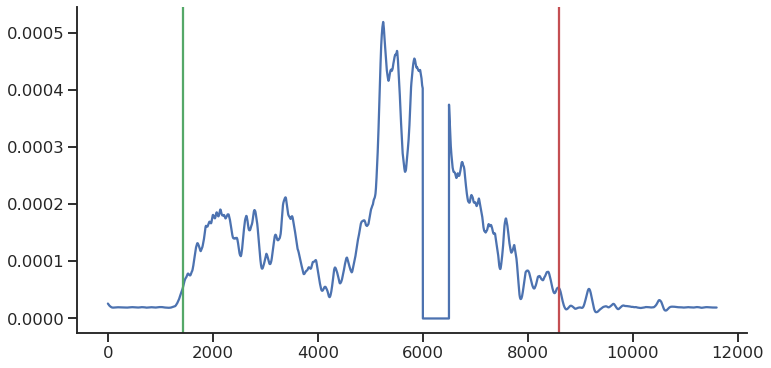

In [14]:
_, ax = plt.subplots(figsize=(12, 6))
signal.plot(ax=ax)
for (inf, sup) in onset:
    ax.axvline(x=inf, color="g")
    ax.axvline(x=sup, color="r")
sns.despine()

## Your turn

Apply the following pipeline on the `raw` channel in the `analogs` array:

1. band-pass (4th order with 10-425Hz cutoff)
2. center
3. rectify
4. low-pass (4th order with 5Hz cutoff)
5. normalize (mvc = 0.0005562179366360516 mV)
6. time_normalize

Then, plot the result

<!--NAVIGATION-->
< [Scientific computing with Numpy](01.02-intro-to-numpy.ipynb) | [Contents](index.ipynb) | [Programming tips and tricks](01.04-tips-and-tricks.ipynb) >